In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [5]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [6]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [9]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 23ms/step - loss: 5.5680 - accuracy: 0.0199
Epoch 2/500
15/15 [==============================] - 0s 22ms/step - loss: 5.5397 - accuracy: 0.0397
Epoch 3/500
15/15 [==============================] - 0s 21ms/step - loss: 5.4706 - accuracy: 0.0751
Epoch 4/500
15/15 [==============================] - 0s 20ms/step - loss: 5.2811 - accuracy: 0.0574
Epoch 5/500
15/15 [==============================] - 0s 18ms/step - loss: 5.1258 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 18ms/step - loss: 5.0619 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 17ms/step - loss: 5.0274 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 18ms/step - loss: 4.9926 - accuracy: 0.0640
Epoch 9/500
15/15 [==============================] - 0s 18ms/step - loss: 4.9601 - accuracy: 0.0662
Epoch 10/500
15/15 [==============================] - 0s 19ms/step - loss: 4.9267 - accuracy: 0.0640

15/15 [==============================] - 0s 18ms/step - loss: 2.4174 - accuracy: 0.5519
Epoch 82/500
15/15 [==============================] - 0s 22ms/step - loss: 2.3935 - accuracy: 0.5695
Epoch 83/500
15/15 [==============================] - 0s 22ms/step - loss: 2.3651 - accuracy: 0.5850
Epoch 84/500
15/15 [==============================] - 0s 20ms/step - loss: 2.3429 - accuracy: 0.5828
Epoch 85/500
15/15 [==============================] - 0s 21ms/step - loss: 2.3182 - accuracy: 0.5850
Epoch 86/500
15/15 [==============================] - 0s 18ms/step - loss: 2.2886 - accuracy: 0.5960
Epoch 87/500
15/15 [==============================] - 0s 18ms/step - loss: 2.2618 - accuracy: 0.6026 0s - loss: 2.2776 - accuracy: 0.59
Epoch 88/500
15/15 [==============================] - 0s 18ms/step - loss: 2.2380 - accuracy: 0.6181
Epoch 89/500
15/15 [==============================] - 0s 18ms/step - loss: 2.2231 - accuracy: 0.6269
Epoch 90/500
15/15 [==============================] - 0s 18ms/step - 

15/15 [==============================] - 0s 18ms/step - loss: 1.0776 - accuracy: 0.8587
Epoch 159/500
15/15 [==============================] - 0s 18ms/step - loss: 1.0626 - accuracy: 0.8631
Epoch 160/500
15/15 [==============================] - 0s 18ms/step - loss: 1.0481 - accuracy: 0.8631
Epoch 161/500
15/15 [==============================] - 0s 18ms/step - loss: 1.0367 - accuracy: 0.8675
Epoch 162/500
15/15 [==============================] - 0s 20ms/step - loss: 1.0259 - accuracy: 0.8609
Epoch 163/500
15/15 [==============================] - 0s 17ms/step - loss: 1.0137 - accuracy: 0.8698
Epoch 164/500
15/15 [==============================] - 0s 19ms/step - loss: 1.0071 - accuracy: 0.8631
Epoch 165/500
15/15 [==============================] - 0s 25ms/step - loss: 1.0016 - accuracy: 0.8675
Epoch 166/500
15/15 [==============================] - 0s 22ms/step - loss: 0.9833 - accuracy: 0.8698
Epoch 167/500
15/15 [==============================] - 0s 21ms/step - loss: 0.9705 - accuracy: 0

15/15 [==============================] - 0s 16ms/step - loss: 0.5086 - accuracy: 0.9404
Epoch 237/500
15/15 [==============================] - 0s 16ms/step - loss: 0.5042 - accuracy: 0.9426
Epoch 238/500
15/15 [==============================] - 0s 16ms/step - loss: 0.4999 - accuracy: 0.9426
Epoch 239/500
15/15 [==============================] - 0s 16ms/step - loss: 0.4959 - accuracy: 0.9448
Epoch 240/500
15/15 [==============================] - 0s 16ms/step - loss: 0.4922 - accuracy: 0.9448
Epoch 241/500
15/15 [==============================] - 0s 17ms/step - loss: 0.4886 - accuracy: 0.9426
Epoch 242/500
15/15 [==============================] - 0s 15ms/step - loss: 0.4842 - accuracy: 0.9404
Epoch 243/500
15/15 [==============================] - 0s 17ms/step - loss: 0.4792 - accuracy: 0.9426
Epoch 244/500
15/15 [==============================] - 0s 17ms/step - loss: 0.4766 - accuracy: 0.9426
Epoch 245/500
15/15 [==============================] - 0s 16ms/step - loss: 0.4723 - accuracy: 0

15/15 [==============================] - 0s 25ms/step - loss: 0.2874 - accuracy: 0.9492
Epoch 316/500
15/15 [==============================] - 0s 18ms/step - loss: 0.2856 - accuracy: 0.9470 0s - loss: 0.2825 - accuracy: 
Epoch 317/500
15/15 [==============================] - 0s 18ms/step - loss: 0.2834 - accuracy: 0.9470
Epoch 318/500
15/15 [==============================] - 0s 18ms/step - loss: 0.2812 - accuracy: 0.9514
Epoch 319/500
15/15 [==============================] - 0s 19ms/step - loss: 0.2795 - accuracy: 0.9514
Epoch 320/500
15/15 [==============================] - 0s 19ms/step - loss: 0.2780 - accuracy: 0.9492
Epoch 321/500
15/15 [==============================] - 0s 18ms/step - loss: 0.2765 - accuracy: 0.9492
Epoch 322/500
15/15 [==============================] - 0s 19ms/step - loss: 0.2742 - accuracy: 0.9514
Epoch 323/500
15/15 [==============================] - 0s 19ms/step - loss: 0.2721 - accuracy: 0.9514
Epoch 324/500
15/15 [==============================] - 0s 17ms/st

15/15 [==============================] - 0s 18ms/step - loss: 0.1870 - accuracy: 0.9536
Epoch 394/500
15/15 [==============================] - 0s 20ms/step - loss: 0.1867 - accuracy: 0.9492 0s - loss: 0.1934 - accuracy: 0.
Epoch 395/500
15/15 [==============================] - 0s 22ms/step - loss: 0.1859 - accuracy: 0.9470
Epoch 396/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1849 - accuracy: 0.9536
Epoch 397/500
15/15 [==============================] - 0s 23ms/step - loss: 0.1842 - accuracy: 0.9492
Epoch 398/500
15/15 [==============================] - 0s 19ms/step - loss: 0.1836 - accuracy: 0.9514
Epoch 399/500
15/15 [==============================] - 0s 17ms/step - loss: 0.1826 - accuracy: 0.9492
Epoch 400/500
15/15 [==============================] - 0s 17ms/step - loss: 0.1816 - accuracy: 0.9536
Epoch 401/500
15/15 [==============================] - 0s 20ms/step - loss: 0.1806 - accuracy: 0.9470
Epoch 402/500
15/15 [==============================] - 0s 20ms/

15/15 [==============================] - 0s 18ms/step - loss: 0.1457 - accuracy: 0.9514 0s - loss: 0.1535 - accuracy: 0.
Epoch 471/500
15/15 [==============================] - 0s 18ms/step - loss: 0.1468 - accuracy: 0.9514
Epoch 472/500
15/15 [==============================] - 0s 18ms/step - loss: 0.1451 - accuracy: 0.9514
Epoch 473/500
15/15 [==============================] - 0s 17ms/step - loss: 0.1445 - accuracy: 0.9536
Epoch 474/500
15/15 [==============================] - 0s 17ms/step - loss: 0.1459 - accuracy: 0.9470
Epoch 475/500
15/15 [==============================] - 0s 18ms/step - loss: 0.1444 - accuracy: 0.9470
Epoch 476/500
15/15 [==============================] - 0s 16ms/step - loss: 0.1427 - accuracy: 0.9470
Epoch 477/500
15/15 [==============================] - 0s 18ms/step - loss: 0.1423 - accuracy: 0.9470
Epoch 478/500
15/15 [==============================] - 0s 17ms/step - loss: 0.1418 - accuracy: 0.9514
Epoch 479/500
15/15 [==============================] - 0s 20ms/

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

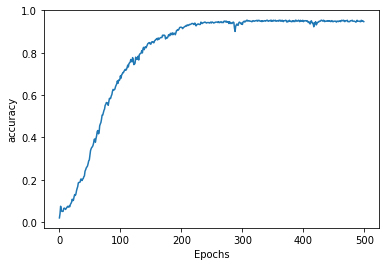

In [11]:
plot_graphs(history, 'accuracy')


In [12]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Laurence went to dublin all around in couples and groups groups phelim mchugh mchugh mchugh glisten replied and gave a accident accident accident accident terrance daughter mchugh mchugh mchugh glisten glisten glisten glisten saw for for for her and all in girls and boys a rose cask whirligig a hullabaloo glisten glisten old chanters together gave for mavrone how i a from nonsense plenty as but listen eyes glisten glisten glisten eyes eyes glisten glisten glisten glisten had replied mavrone how casey casey of miss kerrigan couples and groups a rose hullabaloo ribbons odaly forget tea they nothing mavrone how the wall wall wall
